In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from time import time
from sklearn import svm
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

myparams = []

In [2]:
def preprocessdataframe (df):
    imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
    imputer = imputer.fit(df.loc[:,['Age']])
    df.loc[:,'Age'] = imputer.transform(df.loc[:,['Age']])

    imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
    imputer = imputer.fit(df.loc[:,['Fare']])
    df.loc[:,'Fare'] = imputer.transform(df.loc[:,['Fare']])

    df.Embarked = df.Embarked.fillna('S')

    df = pd.get_dummies(data=df, columns=['Embarked', 'Pclass', 'Sex'])

    return df

In [3]:
def showroccurve(fpr, tpr, roc_auc, label):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve - {0} (area = {1:0.2f})'.format(label, roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [4]:
def showmultiroccurve(params): #this should be a list of dictionaries of fpr, tpr, and roc_auc
    plt.figure()
    lw = 2
    for param in params:
        plt.plot(param["fpr"], param["tpr"], color='darkorange',
             lw=lw, label='ROC curve - {0} (area = {1:0.2f})'.format(param["label"],param["roc_auc"]))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [5]:
df = pd.read_csv('~/Documents/GitHub/TiberDataScienceLearning/Data/Titanic/train.csv')
y = df[['Survived']]
x = df[['Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
x_train = preprocessdataframe(x_train)
x_test = preprocessdataframe(x_test)

In [7]:
#these are the best decision tree hyperparaters that we found in "week 2"
clf = tree.DecisionTreeClassifier(max_depth= 10, max_features = 6, min_impurity_decrease = 0.0001, min_samples_leaf = 0.01, min_samples_split = 0.1)
cross_val_roc = cross_val_score(clf, x_train, y_train, cv=10, scoring='roc_auc')
roc_score = np.mean(cross_val_roc)

print("Using the best hyperparameters: ", roc_score)

Using the best hyperparameters:  0.8421587483360738


Using the best hyperparameters:  0.7949934123847168


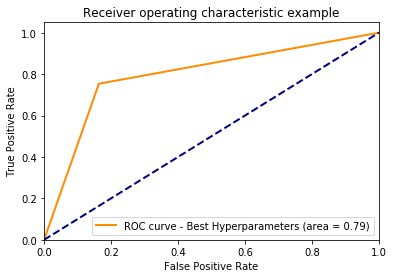

In [8]:
model = clf.fit(x_train, y_train)
y_predictions = model.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predictions)
roc_auc = roc_auc_score(y_test, y_predictions)
label = 'Best Hyperparameters'
print("Using the best hyperparameters: ", roc_auc)
myparam = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc, 'label': label}
myparams.append(myparam)
showroccurve(fpr, tpr, roc_auc, label)


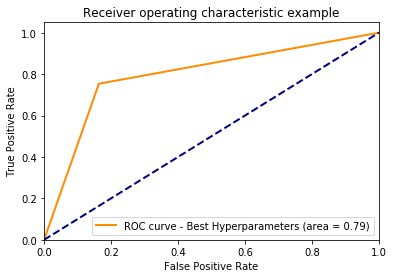

In [9]:
showmultiroccurve(myparams)